# Тема проекта <br>"Анализ характеристик оружия в игре Skyrim: оптимизация игрового процесса и удовлетворение потребностей игроков"

# Описание проекта

Заказчик исследования – компания Bethesda, разработчик игры Skyrim. В рамках данного проекта необходимо проанализировать данные о всех типах оружия, представленных в игре, с целью выявления закономерностей, которые могут повысить удовлетворенность игроков и устойчивость к критике.

# Цели и задачи проекта

**Цели проекта:**<br><br>
Ознакомление со спецификой деятельности по избранному направлению подготовки; формирование практических профессиональных умений, приобретение первоначального практического опыта. Получение глубокого понимания взаимодействия различных характеристик оружия в Skyrim для улучшения игрового баланса и повышения интереса игроков.<br><br>
**Задачи проекта:**
1. Приобретение первичных профессиональных навыков, практического опыта, навыков самостоятельной работы, закрепление, систематизация и расширение теоретических знаний по технологии программирования для решения конкретных прикладных задач в рамках выполнения индивидуального задания.
1. Проведение предварительного анализа данных, выявление дубликатов и некорректных значений.
2. Проверка корректности названий столбцов, приведение их к единому регистру.
3. Проверка каждого столбца на наличие пропусков, по возможности проведение заполнения.
4. При необходимости - изменение типов данных в столбцах.
5. Проведение сравнения характеристик оружия по типам, категориям, урону и весу.
6. Разработка визуализации для интуитивного представления данных.
7. Предложение рекомендаций для доработки баланса в будущих патчах и дополнениях.<br>
Проект будет служить основой для последующего анализа, который позволит Bethesda более качественно разрабатывать контент, удовлетворяющий игрокам.

# Предобработка данных

## 1. Загрузка файла с данными и изучение общей информации

1.1. Импорт библиотек

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

1.2. Загрузка файла с данными

In [372]:
df = pd.read_csv('Skyrim_Weapons.csv')

1.3. Знакомство с данными датафрейма

In [373]:
df

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN
5,Ebony Battleaxe,23,26.0,1585,Ebony Ingot,Ebony,Battleaxe,Two-Handed,NaN
6,Elven Battleaxe,21,24.0,520,Refined Moonstone,Elven,Battleaxe,Two-Handed,NaN
7,Glass Battleaxe,22,25.0,900,Refined Malachite,Glass,Battleaxe,Two-Handed,NaN
8,Headsman's Axe,17,11.0,15,NaN,-,Battleaxe,Two-Handed,NaN
9,Honed Ancient Nord Battle Axe,21,25.0,50,Steel Ingot,Dwarven,Battleaxe,Two-Handed,NaN


Вывод первых 10 строк датафрейма

In [374]:
df.head(10)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN
5,Ebony Battleaxe,23,26.0,1585,Ebony Ingot,Ebony,Battleaxe,Two-Handed,NaN
6,Elven Battleaxe,21,24.0,520,Refined Moonstone,Elven,Battleaxe,Two-Handed,NaN
7,Glass Battleaxe,22,25.0,900,Refined Malachite,Glass,Battleaxe,Two-Handed,NaN
8,Headsman's Axe,17,11.0,15,NaN,-,Battleaxe,Two-Handed,NaN
9,Honed Ancient Nord Battle Axe,21,25.0,50,Steel Ingot,Dwarven,Battleaxe,Two-Handed,NaN


Вывод последних 10 строк датафрейма

In [375]:
df.tail(10)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
283,Enhanced Crossbow,19,15.0,200,Steel Ingot,NaN,Crossbow,Archery,NaN
284,Enhanced Dwarven Crossbow,22,21.0,550,Dwarven metal ingot,NaN,Crossbow,Archery,NaN
285,Steel Bolt,10,0.0,1,NaN,NaN,Bolt,Archery,NaN
286,Dwarven Bolt,14,0.0,3,NaN,NaN,Bolt,Archery,NaN
287,Exploding Steel Bolt of Fire,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
288,Exploding Steel Bolt of Ice,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
289,Exploding Steel Bolt of Shock,10,0.0,5,NaN,NaN,Bolt,Archery,NaN
290,Exploding Dwarven Bolt of Fire,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
291,Exploding Dwarven Bolt of Ice,14,0.0,15,NaN,NaN,Bolt,Archery,NaN
292,Exploding Dwarven Bolt of Shock,14,0.0,15,NaN,NaN,Bolt,Archery,NaN


Вывод случайных строк датафрейма

In [376]:
df.sample(5)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
100,Gauldur Blackblade (Lvl 36+),11,15.0,1286,Steel Ingot,Dwarven,Sword,One-Handed,NaN
115,Lunar Steel Sword (Lvl 6-7),8,10.0,103,Steel Ingot,Steel,Sword,One-Handed,NaN
92,Eduj,11,9.0,300,Steel Ingot,Steel,Sword,One-Handed,NaN
173,Orcish War Axe,10,13.0,90,Orichalcum Ingot,Orcish,War Axe,One-Handed,NaN
79,Chillrend (Lvl 36-45),14,15.0,1111,Refined Malachite,Glass,Sword,One-Handed,NaN


1.4 Знакомство с атрибутами датафрейма

In [377]:
df.columns

Index(['Name', 'Damage', 'Weight', 'Gold', 'Upgrade', 'Perk', 'Type',
       'Category', 'Speed'],
      dtype='object')

In [378]:
df.dtypes

Name         object
Damage        int64
Weight      float64
Gold          int64
Upgrade      object
Perk         object
Type         object
Category     object
Speed       float64
dtype: object

In [379]:
df.shape

(293, 9)

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      293 non-null    object 
 1   Damage    293 non-null    int64  
 2   Weight    293 non-null    float64
 3   Gold      293 non-null    int64  
 4   Upgrade   232 non-null    object 
 5   Perk      210 non-null    object 
 6   Type      293 non-null    object 
 7   Category  293 non-null    object 
 8   Speed     39 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.7+ KB


Описание столбцов:
1. **Name** - название оружия
2. **Damage** - наносимый урон
3. **Weight** - вес
4. **Gold** - цена
5. **Upgrade** - материал, необходимый для создания и улучшения
6. **Perk** - навык, необходимый для улучшения
7. **Type** - тип оружия (кинжал, лук и т.п.)
8. **Category** - навык, отвечающий за владение этим типом оружия
9. **Speed** - скорость натяжения тетивы (только для луков)

Отдельно столбцам upgrade, perk, category будет уделено меньше внимания, так как столбцы name, weight и type в большей степени уже включают в себя информацию этих столбцов. Также, эти параметры сами по себе влияют не на эффективность. Если игрок хочет использовать какое-либо оружие/вид оружия, он собирает для него материалы, улучшает свой perk и category.

### **Выводы**

1. В датафрейме 293 записи, 9 столбцов.
2. В столбцах Upgrade, Perk, Speed имеются пропущенные значения.
3. Следует изменить регистр во всех заголовках столбцов и в значениях столбцов, содержащих текст.
4. Для столбца Weight возможно изменение типа данных для снижения нагрузки.
5. В столбце Perk замечено одновременное присутствие NaN, N/A и - (прочерк), следует проверить столбцы Upgrade, Perk, Speed и заменить все пропуски одинаковыми значениями. 

## 2. Изменение регистра названий и значений столбцов

2.1. Изменение названий столбцов

In [381]:
df.columns = df.columns.str.lower()

2.2. Изменение значений столбцов

In [382]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [383]:
df

,name,damage,weight,gold,upgrade,perk,type,category,speed
0,ancient nord battle axe,18,22.0,28,steel ingot,steel,battleaxe,two-handed,NaN
1,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN
2,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
3,drainblood battleaxe,21,5.0,266,NaN,-,battleaxe,two-handed,NaN
4,dwarven battleaxe,20,23.0,300,dwarven metal ingot,dwarven,battleaxe,two-handed,NaN
5,ebony battleaxe,23,26.0,1585,ebony ingot,ebony,battleaxe,two-handed,NaN
6,elven battleaxe,21,24.0,520,refined moonstone,elven,battleaxe,two-handed,NaN
7,glass battleaxe,22,25.0,900,refined malachite,glass,battleaxe,two-handed,NaN
8,headsman's axe,17,11.0,15,NaN,-,battleaxe,two-handed,NaN
9,honed ancient nord battle axe,21,25.0,50,steel ingot,dwarven,battleaxe,two-handed,NaN


## 3. Изучение пропущенных значений

3.1. Количество пропусков по столбцам

In [384]:
df.isna().sum()

name          0
damage        0
weight        0
gold          0
upgrade      61
perk         83
type          0
category      0
speed       254
dtype: int64

In [385]:
df.head(10)

,name,damage,weight,gold,upgrade,perk,type,category,speed
0,ancient nord battle axe,18,22.0,28,steel ingot,steel,battleaxe,two-handed,NaN
1,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN
2,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
3,drainblood battleaxe,21,5.0,266,NaN,-,battleaxe,two-handed,NaN
4,dwarven battleaxe,20,23.0,300,dwarven metal ingot,dwarven,battleaxe,two-handed,NaN
5,ebony battleaxe,23,26.0,1585,ebony ingot,ebony,battleaxe,two-handed,NaN
6,elven battleaxe,21,24.0,520,refined moonstone,elven,battleaxe,two-handed,NaN
7,glass battleaxe,22,25.0,900,refined malachite,glass,battleaxe,two-handed,NaN
8,headsman's axe,17,11.0,15,NaN,-,battleaxe,two-handed,NaN
9,honed ancient nord battle axe,21,25.0,50,steel ingot,dwarven,battleaxe,two-handed,NaN


3.2. Приведение пропусков к единому обозначению

В стобцах upgrade, perk, speed имеются значения NaN. В столбце perk одновременно присутствует и NaN, N/A и - (прочерк). Необходимо проверить все столбцы и заменить прочерки на NaN (так как пропуски есть и в столбце с текстом, будет удобнее оставить NaN).

In [386]:
for column in df.columns:
    df[column] = df[column].replace({'-': np.NaN, 'N/A': np.NaN, '–': np.NaN})

In [387]:
df.head(10)

,name,damage,weight,gold,upgrade,perk,type,category,speed
0,ancient nord battle axe,18,22.0,28,steel ingot,steel,battleaxe,two-handed,NaN
1,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN
2,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
3,drainblood battleaxe,21,5.0,266,NaN,NaN,battleaxe,two-handed,NaN
4,dwarven battleaxe,20,23.0,300,dwarven metal ingot,dwarven,battleaxe,two-handed,NaN
5,ebony battleaxe,23,26.0,1585,ebony ingot,ebony,battleaxe,two-handed,NaN
6,elven battleaxe,21,24.0,520,refined moonstone,elven,battleaxe,two-handed,NaN
7,glass battleaxe,22,25.0,900,refined malachite,glass,battleaxe,two-handed,NaN
8,headsman's axe,17,11.0,15,NaN,NaN,battleaxe,two-handed,NaN
9,honed ancient nord battle axe,21,25.0,50,steel ingot,dwarven,battleaxe,two-handed,NaN


Теперь количество пропусков отображается верно

In [388]:
df.isna().sum()

name          0
damage        0
weight        0
gold          0
upgrade      61
perk        116
type          0
category      0
speed       254
dtype: int64

## 4. Изменение типов данных

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      293 non-null    object 
 1   damage    293 non-null    int64  
 2   weight    293 non-null    float64
 3   gold      293 non-null    int64  
 4   upgrade   232 non-null    object 
 5   perk      177 non-null    object 
 6   type      293 non-null    object 
 7   category  293 non-null    object 
 8   speed     39 non-null     float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.7+ KB


Вывод уникальных значений столбца weight

In [390]:
df['weight'].unique()

array([22. , 27. , 30. ,  5. , 23. , 26. , 24. , 25. , 11. , 20. , 21. ,
       10. , 36. ,  1. ,  7. ,  4. ,  2.5,  6. ,  6.5,  3.5,  4.5,  2. ,
        3. , 16. , 19. , 17. , 18. , 14. , 13. , 15. ,  9. , 12. ,  0. ,
        0.5, 31. , 33. , 28. , 29. ,  8. ])

Среди уникальных значений есть 0.5 единиц веса и 0.0 единиц веса (ноль это не ошибка, а вес стрел и арбалетных болтов, задуманный разработчиками). Это означает, что тип float не нужно менять на int.

Вывод уникальных значений столбца speed

In [391]:
df['speed'].unique()

array([   nan, 0.875 , 0.937 , 1.    , 0.5   , 0.75  , 0.562 , 0.687 ,
       0.625 , 0.6875, 0.812 , 0.5625])

В этом столбце все значения имеют тип float, что также не явилось ошибкой.

## 5. Поиск дубликатов

5.1. Поиск явных дубликатов

In [392]:
df.duplicated().sum()

0

5.2. Проверка дубликатов по столбцу name

In [393]:
df['name'].value_counts()

name
gauldur blackbow                   5
nightingale bow                    5
ancient nord battle axe            1
honed ancient nord greatsword      1
glass greatsword                   1
elven greatsword                   1
ebony blade                        1
ebony greatsword                   1
dwarven greatsword                 1
dragonbone greatsword              1
ulfric's war axe                   1
daedric greatsword                 1
bloodskal blade dr                 1
balgruuf's greatsword              1
ancient nord greatsword            1
knife                              1
fork                               1
iron greatsword                    1
nord hero greatsword               1
nordic greatsword dr               1
daedric warhammer                  1
elven warhammer                    1
ebony warhammer                    1
dwarven warhammer                  1
dragonbone warhammer               1
dawnguard rune hammer              1
dawnguard warhammer              

5.3. Вывод строк с дублированными значениями

In [394]:
df.loc[df['name'].isin(["gauldur blackbow", "nightingale bow"])]

,name,damage,weight,gold,upgrade,perk,type,category,speed
239,gauldur blackbow,8,12.0,253,steel ingot,dwarven,bow,archery,0.875
240,gauldur blackbow,8,12.0,407,steel ingot,dwarven,bow,archery,0.875
241,gauldur blackbow,14,18.0,530,steel ingot,dwarven,bow,archery,0.875
242,gauldur blackbow,14,18.0,750,steel ingot,dwarven,bow,archery,0.875
243,gauldur blackbow,14,18.0,972,steel ingot,dwarven,bow,archery,0.875
255,nightingale bow,12,9.0,493,ebony ingot,NaN,bow,archery,0.500
256,nightingale bow,13,11.0,838,ebony ingot,NaN,bow,archery,0.500
257,nightingale bow,15,13.0,1409,ebony ingot,NaN,bow,archery,0.500
258,nightingale bow,17,15.0,2240,ebony ingot,NaN,bow,archery,0.500
259,nightingale bow,19,18.0,3405,ebony ingot,NaN,bow,archery,0.500


Из wiki по игре стало понятно, что у этих оружий имеется по 5 вариаций (вариация зависит от уровня игрока).
<br>gauldur blackbow:
https://elderscrolls.fandom.com/ru/wiki/Чёрный_лук_Голдура
<br>nightingale bow: https://elderscrolls.fandom.com/wiki/Nightingale_Bow#:~:text=The%20Nightingale%20Bow%20is%20a,during%20the%20Thieves%20Guild%20questline 

5.4. Удаление всех оружий низкого уровня для избежания расчетов с дубликатами

Для начала удалим найденные дубликаты

In [395]:
df.drop(df.index[239:243], inplace=True)
df.drop(df.index[251:255], inplace=True)

Сброс индексов

In [396]:
df.reset_index(drop=True, inplace=True)

In [397]:
df.loc[df['name'].isin(["gauldur blackbow", "nightingale bow"])]

,name,damage,weight,gold,upgrade,perk,type,category,speed
239,gauldur blackbow,14,18.0,972,steel ingot,dwarven,bow,archery,0.875
251,nightingale bow,19,18.0,3405,ebony ingot,NaN,bow,archery,0.500


Теперь для каждого оружия с несколькими вариациями удалим все кроме последней

In [398]:
lvl_weapons = df[df['name'].str.contains(r'\(lvl')]
lvl_weapons

,name,damage,weight,gold,upgrade,perk,type,category,speed
55,lunar iron mace (lvl 2-3),9,13.0,99,iron ingot,NaN,mace,one-handed,NaN
56,lunar iron mace (lvl 4-5),9,13.0,133,iron ingot,NaN,mace,one-handed,NaN
57,lunar iron mace (lvl 6+),9,13.0,168,iron ingot,NaN,mace,one-handed,NaN
58,lunar steel mace (lvl 4-5),10,14.0,129,iron ingot,NaN,mace,one-handed,NaN
59,lunar steel mace (lvl 6-7),10,14.0,163,iron ingot,NaN,mace,one-handed,NaN
60,lunar steel mace (lvl 8+),10,14.0,198,iron ingot,NaN,mace,one-handed,NaN
76,chillrend (lvl 11-18),11,12.0,635,refined malachite,glass,sword,one-handed,NaN
77,chillrend (lvl 19-26),12,13.0,872,refined malachite,glass,sword,one-handed,NaN
78,chillrend (lvl 27-35),13,14.0,846,refined malachite,glass,sword,one-handed,NaN
79,chillrend (lvl 36-45),14,15.0,1111,refined malachite,glass,sword,one-handed,NaN


Группируем оружия по названию и оставляем последнии вариации

In [399]:
latest_versions = lvl_weapons.groupby(df['name'].str.extract(r'(^.+? \()')[0]).last().reset_index(drop=True)

Переименовываем, убрав приписку в скобках

In [400]:
latest_versions['name'] = latest_versions['name'].str.replace(r' \(lvl.*\)', '', regex=True)

In [401]:
latest_versions

,name,damage,weight,gold,upgrade,perk,type,category,speed
0,chillrend,15,16.0,1442,refined malachite,glass,sword,one-handed,NaN
1,dragonbane,14,14.0,2596,quicksilver ingot,steel,sword,one-handed,NaN
2,gauldur blackblade,11,15.0,1286,steel ingot,dwarven,sword,one-handed,NaN
3,lunar iron mace,9,13.0,168,iron ingot,None,mace,one-handed,NaN
4,lunar iron sword,7,9.0,158,iron ingot,None,sword,one-handed,NaN
5,lunar iron war axe,8,11.0,163,iron ingot,None,war axe,one-handed,NaN
6,lunar steel mace,10,14.0,198,iron ingot,None,mace,one-handed,NaN
7,lunar steel sword,8,10.0,138,steel ingot,steel,sword,one-handed,NaN
8,lunar steel war axe,9,12.0,188,steel ingot,steel,war axe,one-handed,NaN
9,nightingale blade,14,15.0,1665,ebony ingot,None,sword,one-handed,NaN


Убираем оружия с уровнем из основного DataFrame

In [402]:
df = df[~df.index.isin(lvl_weapons.index)]

Соединяем обратно с результатами наивысших уровней

In [403]:
df = pd.concat([df, latest_versions])

Сортировка по типу и названию оружия

In [404]:
df.sort_values(['type', 'name'], inplace=True)

Сброс индексов

In [405]:
df.reset_index(drop=True, inplace=True)

In [406]:
df

,name,damage,weight,gold,upgrade,perk,type,category,speed
0,ancient nord arrow,10,0.0,1,NaN,NaN,arrow,archery,NaN
1,bloodcursed elven arrow dg,16,0.0,6,NaN,NaN,arrow,archery,NaN
2,daedric arrow,24,0.0,8,NaN,NaN,arrow,archery,NaN
3,dragonbone arrow dg,25,0.0,9,NaN,NaN,arrow,archery,NaN
4,dwarven arrow,14,0.0,4,NaN,NaN,arrow,archery,NaN
5,dwarven sphere centurion arrow,20,0.0,0,NaN,NaN,arrow,archery,NaN
6,ebony arrow,20,0.0,7,NaN,NaN,arrow,archery,NaN
7,elven arrow,16,0.0,5,NaN,NaN,arrow,archery,NaN
8,falmer arrow,7,0.0,1,NaN,NaN,arrow,archery,NaN
9,forsworn arrow,7,0.0,1,NaN,NaN,arrow,archery,NaN


## 6. Выводы к разделу 1

1. Данные загружены и проведен первичный анализ.
2. Наименования столбцов и весь текст приведены к нижнему регистру.
3. Пропущенные значения изучены и обработаны.
4. Типы данных в столбцах проверены.
5. Найдены и удалены дубликаты.<br>После выполнения всех шагов, получен чистый и организованный датафрейм, готовый для дальнейшего анализа.

# Исследовательский анализ данных

## 1. Индексация (по координатам, логическая)

1.1. Индексация по координатам

Первые 5 строк

In [407]:
df.loc[:5]

,name,damage,weight,gold,upgrade,perk,type,category,speed
0,ancient nord arrow,10,0.0,1,NaN,NaN,arrow,archery,NaN
1,bloodcursed elven arrow dg,16,0.0,6,NaN,NaN,arrow,archery,NaN
2,daedric arrow,24,0.0,8,NaN,NaN,arrow,archery,NaN
3,dragonbone arrow dg,25,0.0,9,NaN,NaN,arrow,archery,NaN
4,dwarven arrow,14,0.0,4,NaN,NaN,arrow,archery,NaN
5,dwarven sphere centurion arrow,20,0.0,0,NaN,NaN,arrow,archery,NaN


Все строки, колонка damage

In [408]:
df.loc[:, 'damage']

0      10
1      16
2      24
3      25
4      14
5      20
6      20
7      16
8       7
9       7
10     18
11      8
12     14
13     12
14      0
15     10
16      4
17     20
18     10
19     16
20     18
21     25
22     26
23     21
24     20
25     23
26     21
27     22
28     17
29     21
30     16
31     21
32     21
33     19
34     22
35     21
36     24
37     18
38     18
39     17
40     27
41     25
42     14
43     14
44     14
45     14
46     10
47     10
48     10
49     10
50      8
51      7
52     13
53     10
54     19
55     20
56     14
57      7
58     13
59     12
60     17
61     13
62     12
63     15
64     13
65     12
66      6
67     14
68     15
69     16
70      7
71      9
72     25
73      6
74     19
75     11
76     13
77     10
78     17
79     14
80     12
81     19
82     22
83     19
84     22
85      5
86     10
87     12
88      8
89      8
90     11
91      6
92     12
93      7
94     10
95      8
96      9
97      4
98      6
99      8


Срез столбцов

In [409]:
df.loc[:, 'damage':'gold']

,damage,weight,gold
0,10,0.0,1
1,16,0.0,6
2,24,0.0,8
3,25,0.0,9
4,14,0.0,4
5,20,0.0,0
6,20,0.0,7
7,16,0.0,5
8,7,0.0,1
9,7,0.0,1


Срез столбца

In [410]:
df.loc[100:103, 'name']

100    mehrunes' razor
101         nettlebane
102     nordic dagger 
103      orcish dagger
Name: name, dtype: object

Срез нескольких строк

In [411]:
df[14:23]

,name,damage,weight,gold,upgrade,perk,type,category,speed
14,practice arrow,0,0.0,0,NaN,NaN,arrow,archery,NaN
15,riekling spear dr,10,0.0,2,NaN,NaN,arrow,archery,NaN
16,rusty arrow,4,0.0,0,NaN,NaN,arrow,archery,NaN
17,stalhrim arrow dr,20,0.0,7,NaN,NaN,arrow,archery,NaN
18,steel arrow,10,0.0,2,NaN,NaN,arrow,archery,NaN
19,sunhallowed elven arrow dg,16,0.0,16,NaN,NaN,arrow,archery,NaN
20,ancient nord battle axe,18,22.0,28,steel ingot,steel,battleaxe,two-handed,NaN
21,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN
22,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN


1.2. Логическая индексация

Легкие мечи

In [412]:
df[(df['weight'] < 3) & (df['type'] == 'sword')] 

,name,damage,weight,gold,upgrade,perk,type,category,speed
170,ghostblade,8,1.0,300,3 ectoplasm,NaN,sword,one-handed,NaN
187,phantom sword,1,0.0,0,NaN,NaN,sword,one-handed,NaN


Двуручное оружие

In [413]:
df[df['category'] == 'two-handed']

,name,damage,weight,gold,upgrade,perk,type,category,speed
20,ancient nord battle axe,18,22.0,28,steel ingot,steel,battleaxe,two-handed,NaN
21,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN
22,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
23,drainblood battleaxe,21,5.0,266,NaN,NaN,battleaxe,two-handed,NaN
24,dwarven battleaxe,20,23.0,300,dwarven metal ingot,dwarven,battleaxe,two-handed,NaN
25,ebony battleaxe,23,26.0,1585,ebony ingot,ebony,battleaxe,two-handed,NaN
26,elven battleaxe,21,24.0,520,refined moonstone,elven,battleaxe,two-handed,NaN
27,glass battleaxe,22,25.0,900,refined malachite,glass,battleaxe,two-handed,NaN
28,headsman's axe,17,11.0,15,NaN,NaN,battleaxe,two-handed,NaN
29,honed ancient nord battle axe,21,25.0,50,steel ingot,dwarven,battleaxe,two-handed,NaN


Нужна кость дракона для улучшения

In [414]:
df[df['upgrade'].str.contains('dragon', na=False)]

,name,damage,weight,gold,upgrade,perk,type,category,speed
22,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
55,dragonbone bow dg,20,20.0,2725,dragon bone,dragon,bow,archery,0.75
92,dragonbone dagger,12,6.5,600,dragon bone,dragon,dagger,one-handed,NaN
114,dragonbone greatsword,25,27.0,2725,dragon bone,dragon,greatsword,two-handed,NaN
131,dragonbone mace,17,22.0,2000,dragon bone,dragon,mace,one-handed,NaN
161,dragonbone sword,15,19.0,1500,dragon bone,dragon,sword,one-handed,NaN
207,dragonbone war axe,16,21.0,1700,dragon bone,dragon,war axe,one-handed,NaN
239,dragonbone warhammer,28,33.0,4275,dragon bone,dragon,warhammer,two-handed,NaN


Оружие с максимальным уроном

In [415]:
df.loc[df['damage'] == df['damage'].max()]

,name,damage,weight,gold,upgrade,perk,type,category,speed
239,dragonbone warhammer,28,33.0,4275,dragon bone,dragon,warhammer,two-handed,NaN


Дешевое оружие с уроном выше 20, не являющееся стрелой

In [416]:
df[(df['gold'] < 300) & (df['damage'] > 20) & (df['type'] != 'arrow')]

,name,damage,weight,gold,upgrade,perk,type,category,speed
23,drainblood battleaxe,21,5.0,266,NaN,NaN,battleaxe,two-handed,NaN
29,honed ancient nord battle axe,21,25.0,50,steel ingot,dwarven,battleaxe,two-handed,NaN
35,skyforge steel battleaxe,21,21.0,150,steel ingot,steel,battleaxe,two-handed,NaN
72,karliah's bow,25,9.0,5,NaN,NaN,bow,archery,0.625
238,dawnguard warhammer,22,26.0,110,steel ingot,steel,warhammer,two-handed,NaN
246,orcish warhammer,21,26.0,180,orichalcum ingot,orcish,warhammer,two-handed,NaN
247,shagrol's warhammer,21,26.0,200,orichalcum ingot,orcish,warhammer,two-handed,NaN
250,the longhammer,21,18.0,90,orichalcum ingot,orcish,warhammer,two-handed,NaN


## 2. Сортировка данных

2.1. Сортировка по урону

Наибольший урон

In [417]:
df.sort_values(by='damage', ascending=False)[:20]

,name,damage,weight,gold,upgrade,perk,type,category,speed
239,dragonbone warhammer,28,33.0,4275,dragon bone,dragon,warhammer,two-handed,NaN
40,tsun's battleaxe,27,36.0,1000,NaN,NaN,battleaxe,two-handed,NaN
236,daedric warhammer,27,31.0,4000,ebony ingot,daedric,warhammer,two-handed,NaN
22,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
248,stalhrim warhammer,26,29.0,2850,stalhrim,ebony,warhammer,two-handed,NaN
252,volendrung,25,26.0,1843,ebony ingot,NaN,warhammer,two-handed,NaN
241,ebony warhammer,25,30.0,1725,ebony ingot,ebony,warhammer,two-handed,NaN
41,wuuthrad,25,25.0,2000,NaN,NaN,battleaxe,two-handed,NaN
114,dragonbone greatsword,25,27.0,2725,dragon bone,dragon,greatsword,two-handed,NaN
21,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN


Наименьший урон

In [418]:
df.sort_values(by='damage')[:10]

,name,damage,weight,gold,upgrade,perk,type,category,speed
14,practice arrow,0,0.0,0,NaN,NaN,arrow,archery,NaN
147,fork,1,0.5,5,NaN,NaN,silverware,one-handed,NaN
187,phantom sword,1,0.0,0,NaN,NaN,sword,one-handed,NaN
218,illusory war axe,1,14.0,15,NaN,NaN,war axe,one-handed,NaN
200,wooden sword,2,3.0,25,firewood,NaN,sword,one-handed,NaN
148,knife,2,0.5,1,NaN,NaN,silverware,one-handed,NaN
97,iron dagger,4,2.0,10,iron ingot,NaN,dagger,one-handed,NaN
16,rusty arrow,4,0.0,0,NaN,NaN,arrow,archery,NaN
85,alessandra's dagger,5,1.0,10,NaN,NaN,dagger,one-handed,NaN
215,hoarfrost,5,10.0,946,NaN,NaN,war axe,one-handed,NaN


2.2. Сортировка по весу

Наибольший вес

In [419]:
df.sort_values(by='weight', ascending=False)[:20]

,name,damage,weight,gold,upgrade,perk,type,category,speed
40,tsun's battleaxe,27,36.0,1000,NaN,NaN,battleaxe,two-handed,NaN
239,dragonbone warhammer,28,33.0,4275,dragon bone,dragon,warhammer,two-handed,NaN
236,daedric warhammer,27,31.0,4000,ebony ingot,daedric,warhammer,two-handed,NaN
22,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
241,ebony warhammer,25,30.0,1725,ebony ingot,ebony,warhammer,two-handed,NaN
243,glass warhammer,24,29.0,985,refined malachite,glass,warhammer,two-handed,NaN
248,stalhrim warhammer,26,29.0,2850,stalhrim,ebony,warhammer,two-handed,NaN
242,elven warhammer,23,28.0,565,refined moonstone,elven,warhammer,two-handed,NaN
245,nordic warhammer,23,27.0,700,quicksilver ingot,advanced,warhammer,two-handed,NaN
114,dragonbone greatsword,25,27.0,2725,dragon bone,dragon,greatsword,two-handed,NaN


Наименьший вес (луков в списке не было, поэтому можно отфильтровать по категории)

In [420]:
df[df['category'] != 'archery'].sort_values(by='weight')[:10]

,name,damage,weight,gold,upgrade,perk,type,category,speed
187,phantom sword,1,0.0,0,NaN,NaN,sword,one-handed,NaN
148,knife,2,0.5,1,NaN,NaN,silverware,one-handed,NaN
147,fork,1,0.5,5,NaN,NaN,silverware,one-handed,NaN
85,alessandra's dagger,5,1.0,10,NaN,NaN,dagger,one-handed,NaN
170,ghostblade,8,1.0,300,3 ectoplasm,NaN,sword,one-handed,NaN
97,iron dagger,4,2.0,10,iron ingot,NaN,dagger,one-handed,NaN
105,shiv,5,2.0,5,NaN,NaN,dagger,one-handed,NaN
88,bloodthorn,8,2.5,183,steel ingot,steel,dagger,one-handed,NaN
104,rundi's dagger,5,2.5,18,steel ingot,steel,dagger,one-handed,NaN
109,valdr's lucky dagger,5,2.5,15,steel ingot,steel,dagger,one-handed,NaN


2.3. Сортировка по цене

Наибольшая цена

In [421]:
df.sort_values(by='gold', ascending=False)[:20]

,name,damage,weight,gold,upgrade,perk,type,category,speed
239,dragonbone warhammer,28,33.0,4275,dragon bone,dragon,warhammer,two-handed,NaN
236,daedric warhammer,27,31.0,4000,ebony ingot,daedric,warhammer,two-handed,NaN
74,nightingale bow,19,18.0,3405,ebony ingot,NaN,bow,archery,0.5000
22,dragonbone battleaxe,26,30.0,3000,dragon bone,dragon,battleaxe,two-handed,NaN
248,stalhrim warhammer,26,29.0,2850,stalhrim,ebony,warhammer,two-handed,NaN
21,daedric battleaxe,25,27.0,2750,ebony ingot,daedric,battleaxe,two-handed,NaN
55,dragonbone bow dg,20,20.0,2725,dragon bone,dragon,bow,archery,0.7500
114,dragonbone greatsword,25,27.0,2725,dragon bone,dragon,greatsword,two-handed,NaN
160,dragonbane,14,14.0,2596,quicksilver ingot,steel,sword,one-handed,NaN
113,daedric greatsword,24,23.0,2500,ebony ingot,daedric,greatsword,two-handed,NaN


Наименьшая цена

In [422]:
df[(df['type'] != 'arrow') & (df['type'] != 'bolt')].sort_values(by='gold')[:20]

,name,damage,weight,gold,upgrade,perk,type,category,speed
187,phantom sword,1,0.0,0,NaN,NaN,sword,one-handed,NaN
148,knife,2,0.5,1,NaN,NaN,silverware,one-handed,NaN
101,nettlebane,6,10.0,5,ebony ingot,NaN,dagger,one-handed,NaN
72,karliah's bow,25,9.0,5,NaN,NaN,bow,archery,0.625
144,rusty mace,7,13.0,5,NaN,NaN,mace,one-handed,NaN
203,ceremonial axe,9,14.0,5,steel ingot,steel,war axe,one-handed,NaN
99,keening,8,4.0,5,NaN,NaN,dagger,one-handed,NaN
105,shiv,5,2.0,5,NaN,NaN,dagger,one-handed,NaN
233,woodcutter's axe,5,10.0,5,NaN,NaN,war axe,one-handed,NaN
191,scimitar,11,10.0,5,steel ingot,steel,sword,one-handed,NaN


**Выводы**
1. Замечены явные закономерности в отношениях урона, веса и цены.
2. Максимальный урон наносят дорогие двуручные оружия. Также они имеют максимальный вес.
3. Лучшие виды оружия по урону - драконье, даэдрическое, сталгримовое, эбонитовое.
4. Создаваемое оружие в конечном итоге окажется лучше того, что выдается за задания (однако для улучшения нужны соответсвующие материалы и навыки)

## 3. Фильтрация данных

3.1. Метод query

Дешевое оружие ближнего боя

In [423]:
df.query('gold < 300 and category != "archery"')

,name,damage,weight,gold,upgrade,perk,type,category,speed
20,ancient nord battle axe,18,22.0,28,steel ingot,steel,battleaxe,two-handed,NaN
23,drainblood battleaxe,21,5.0,266,NaN,NaN,battleaxe,two-handed,NaN
28,headsman's axe,17,11.0,15,NaN,NaN,battleaxe,two-handed,NaN
29,honed ancient nord battle axe,21,25.0,50,steel ingot,dwarven,battleaxe,two-handed,NaN
30,iron battleaxe,16,20.0,55,iron ingot,NaN,battleaxe,two-handed,NaN
33,orcish battleaxe,19,25.0,165,orichalcum ingot,orcish,battleaxe,two-handed,NaN
35,skyforge steel battleaxe,21,21.0,150,steel ingot,steel,battleaxe,two-handed,NaN
37,steel battleaxe,18,21.0,100,steel ingot,steel,battleaxe,two-handed,NaN
39,the woodsman's friend,17,20.0,28,NaN,NaN,battleaxe,two-handed,NaN
85,alessandra's dagger,5,1.0,10,NaN,NaN,dagger,one-handed,NaN


Самые дешевые оружия с большим уроном

In [424]:
df.query('damage > 23 and gold < 1000 and type != "arrow"')

,name,damage,weight,gold,upgrade,perk,type,category,speed
72,karliah's bow,25,9.0,5,NaN,NaN,bow,archery,0.625
243,glass warhammer,24,29.0,985,refined malachite,glass,warhammer,two-handed,NaN


Кинжалы с наибольшим уроном

In [425]:
df.query('type == "dagger" and damage > 10')

,name,damage,weight,gold,upgrade,perk,type,category,speed
87,blade of woe,12,7.0,880,none required,steel,dagger,one-handed,NaN
90,daedric dagger,11,6.0,500,ebony ingot,daedric,dagger,one-handed,NaN
92,dragonbone dagger,12,6.5,600,dragon bone,dragon,dagger,one-handed,NaN
100,mehrunes' razor,11,3.0,860,ebony ingot,NaN,dagger,one-handed,NaN


Самые быстрые луки

In [426]:
df.query('speed > 0.9')

,name,damage,weight,gold,upgrade,perk,type,category,speed
51,angi's bow,7,7.0,50,steel ingot,steel,bow,archery,0.937
52,auriel's bow dg,13,11.0,1000,refined moonstone,elven,bow,archery,1.000
53,bow of the hunt,10,7.0,434,steel ingot,steel,bow,archery,0.937
57,dravin's bow,7,7.0,50,leather strips,steel,bow,archery,0.937
66,froki's bow,6,5.0,307,iron ingot,NaN,bow,archery,1.000
70,hunting bow,7,7.0,50,leather strips,steel,bow,archery,0.937
73,long bow,6,5.0,30,firewood,NaN,bow,archery,1.000
80,zephyr dg,12,10.0,670,dwarven metal ingot,dwarven,bow,archery,1.000


Столовые приборы

In [427]:
df.query('type == "silverware"')

,name,damage,weight,gold,upgrade,perk,type,category,speed
147,fork,1,0.5,5,NaN,NaN,silverware,one-handed,NaN
148,knife,2,0.5,1,NaN,NaN,silverware,one-handed,NaN


3.2. Оператор where

Дорогое оружие ближнего боя

In [428]:
where_filter_1 = df.where((df['gold'] > 2000) & (df['category'] != 'archery'))
where_filter_1 = where_filter_1[where_filter_1['name'].notna()]
where_filter_1

,name,damage,weight,gold,upgrade,perk,type,category,speed
21,daedric battleaxe,25.0,27.0,2750.0,ebony ingot,daedric,battleaxe,two-handed,NaN
22,dragonbone battleaxe,26.0,30.0,3000.0,dragon bone,dragon,battleaxe,two-handed,NaN
36,stalhrim battleaxe,24.0,25.0,2150.0,stalhrim,ebony,battleaxe,two-handed,NaN
113,daedric greatsword,24.0,23.0,2500.0,ebony ingot,daedric,greatsword,two-handed,NaN
114,dragonbone greatsword,25.0,27.0,2725.0,dragon bone,dragon,greatsword,two-handed,NaN
160,dragonbane,14.0,14.0,2596.0,quicksilver ingot,steel,sword,one-handed,NaN
236,daedric warhammer,27.0,31.0,4000.0,ebony ingot,daedric,warhammer,two-handed,NaN
239,dragonbone warhammer,28.0,33.0,4275.0,dragon bone,dragon,warhammer,two-handed,NaN
248,stalhrim warhammer,26.0,29.0,2850.0,stalhrim,ebony,warhammer,two-handed,NaN


Самые дорогие оружия с маленьким уроном

In [429]:
where_filter_2 = df.where((df['gold'] > 800) & (df['damage'] < 10))
where_filter_2 = where_filter_2[where_filter_2['name'].notna()]
where_filter_2

,name,damage,weight,gold,upgrade,perk,type,category,speed
173,harkon's sword,8.0,9.0,1472.0,steel ingot,steel,sword,one-handed,NaN
215,hoarfrost,5.0,10.0,946.0,NaN,NaN,war axe,one-handed,NaN


Кинжалы с наименьшим уроном

In [430]:
where_filter_3 = df.where((df['type'] == 'dagger') & (df['damage'] < 6))
where_filter_3 = where_filter_3[where_filter_3['name'].notna()]
where_filter_3

,name,damage,weight,gold,upgrade,perk,type,category,speed
85,alessandra's dagger,5.0,1.0,10.0,NaN,NaN,dagger,one-handed,NaN
97,iron dagger,4.0,2.0,10.0,iron ingot,NaN,dagger,one-handed,NaN
104,rundi's dagger,5.0,2.5,18.0,steel ingot,steel,dagger,one-handed,NaN
105,shiv,5.0,2.0,5.0,NaN,NaN,dagger,one-handed,NaN
108,steel dagger,5.0,2.5,18.0,steel ingot,steel,dagger,one-handed,NaN
109,valdr's lucky dagger,5.0,2.5,15.0,steel ingot,steel,dagger,one-handed,NaN


Самые медленные луки

In [431]:
where_filter_4 = df.where((df['type'] == 'bow') & (df['speed'] < 0.6))
where_filter_4 = where_filter_4[where_filter_4['name'].notna()]
where_filter_4

,name,damage,weight,gold,upgrade,perk,type,category,speed
54,daedric bow,19.0,18.0,2500.0,ebony ingot,daedric,bow,archery,0.5000
60,ebony bow,17.0,16.0,1440.0,ebony ingot,ebony,bow,archery,0.5620
74,nightingale bow,19.0,18.0,3405.0,ebony ingot,NaN,bow,archery,0.5000
78,stalhrim bow dr,17.0,15.0,1800.0,stalhrim,ebony,bow,archery,0.5625


Луки с наибольшим уроном в секунду

In [432]:
where_filter_4 = df.where(df['type'] == 'bow')
where_filter_4 = where_filter_4[where_filter_4['name'].notna()]
where_filter_4['dps'] = where_filter_4['damage'] * where_filter_4['speed']

where_filter_4 = where_filter_4.where(where_filter_4['dps'] > 10)
where_filter_4 = where_filter_4[where_filter_4['name'].notna()]
where_filter_4.sort_values(by='dps', ascending=False)

,name,damage,weight,gold,upgrade,perk,type,category,speed,dps
72,karliah's bow,25.0,9.0,5.0,NaN,NaN,bow,archery,0.625,15.625
55,dragonbone bow dg,20.0,20.0,2725.0,dragon bone,dragon,bow,archery,0.750,15.000
52,auriel's bow dg,13.0,11.0,1000.0,refined moonstone,elven,bow,archery,1.000,13.000
56,drainspell bow,14.0,6.0,458.0,NaN,NaN,bow,archery,0.875,12.250
67,gauldur blackbow,14.0,18.0,972.0,steel ingot,dwarven,bow,archery,0.875,12.250
79,supple ancient nord bow,14.0,18.0,235.0,NaN,NaN,bow,archery,0.875,12.250
80,zephyr dg,12.0,10.0,670.0,dwarven metal ingot,dwarven,bow,archery,1.000,12.000
63,falmer supple bow,15.0,20.0,410.0,NaN,NaN,bow,archery,0.750,11.250
65,forsworn bow,12.0,11.0,145.0,steel ingot,steel,bow,archery,0.875,10.500


## 4. Сводные таблицы

Средний урон по типам оружия

In [433]:
df.pivot_table(index='type', values='damage', aggfunc='mean').sort_values(by='damage')

,damage
type,
silverware,1.500000
dagger,7.720000
war axe,9.818182
sword,10.307692
bolt,12.000000
mace,12.470588
bow,12.870968
arrow,13.550000
greatsword,19.200000


Средняя цена оружия по типу и перку

In [434]:
df.pivot_table(index='type', columns='perk', values='gold', aggfunc='mean')

perk,advanced,daedric,dragon,dwarven,ebony,elven,glass,orcish,steel
type,,,,,,,,,
battleaxe,650.0,2750.000000,3000.0,175.0,1867.5,520.000000,900.00,165.000000,179.600000
bow,580.0,2500.000000,2725.0,839.5,1620.0,751.666667,597.50,150.000000,129.000000
dagger,115.0,500.000000,600.0,55.0,342.5,56.500000,165.00,30.000000,222.800000
greatsword,585.0,2500.000000,2725.0,166.5,1705.0,470.000000,820.00,75.000000,315.000000
mace,410.0,1750.000000,2000.0,190.0,1187.5,330.000000,575.00,105.000000,157.500000
sword,290.0,1369.666667,1500.0,394.2,852.5,437.000000,782.75,75.000000,386.947368
war axe,350.0,1500.000000,1700.0,96.0,1022.5,280.000000,490.00,90.000000,109.363636
warhammer,700.0,4000.000000,4275.0,325.0,2287.5,565.000000,985.00,156.666667,210.250000


Средний урон по весу оружия

In [435]:
df.pivot_table(index='weight', values='damage', aggfunc='mean')

,damage
weight,
0.0,12.689655
0.5,1.500000
1.0,6.500000
2.0,4.500000
2.5,6.200000
3.0,9.200000
3.5,7.500000
4.0,8.500000
4.5,9.500000


Подсчет количества видов оружия по типу

In [436]:
df.pivot_table(index='type', values='name', aggfunc='count')

,name
type,
arrow,20
battleaxe,22
bolt,8
bow,31
crossbow,4
dagger,25
greatsword,20
mace,17
silverware,2


**Выводы**
1. Арбалет в среднем обгоняет остальное оружие по урону за одно нажатие - 32 единицы (так как складывается урон арбалета и болта). На втором месте - лук с 26.3 единицами (складывается урон лука и стрелы). Это можно объяснить тем, что стрелковое оружие расходует ресурсы на использование и требует от игрока меткости. Самым слабым оружием оказались столовые приборы.
2. Самое дорогое оружие - драконье и даэдрическое (с огромным отрывом). Объясняется это труднодоступностью. Самое дешевое же оружие - орочье, ведь его создают отделенные от цивилизации орки, считающиеся не самой развитой расой.
3. Лучшие показатели в соотношении урон/вес имеет оружие весом 3, 4.5, 6, 17, 29, 33.
4. Самое большое количество разновидностей имеет одноручный меч, ведь это самое базовое оружие для фентези вселенной. Также это обусловлено наличием армий в мире игры. Самое эффективное оружие по соотношению цена производства/эффективность на поле боя это меч. Меньше всего арбалетов и столовых приборов. Число арбалетов обусловлено сложность техники создания, а столовые приборы как оружие были добавлены ради шутки.

## 5. Группировка данных, агрегатные функции

Группировка по типу оружия

In [437]:
df.groupby('type').agg({'damage': ['sum', 'mean', 'min', 'max'],
                          'gold': ['sum', 'mean']})

damage                      gold             
              sum       mean min max    sum         mean
type                                                    
arrow         271  13.550000   0  25     83     4.150000
battleaxe     463  21.045455  16  27  17515   796.136364
bolt           96  12.000000  10  14     64     8.000000
bow           399  12.870968   6  25  22052   711.354839
crossbow       82  20.500000  19  22   1220   305.000000
dagger        193   7.720000   4  12   4459   178.360000
greatsword    384  19.200000  11  25  16268   813.400000
mace          212  12.470588   7  17  10043   590.764706
silverware      3   1.500000   1   2      6     3.000000
sword         536  10.307692   1  16  24703   475.057692
war axe       324   9.818182   1  16  10206   309.272727
warhammer     430  22.631579  18  28  20586  1083.473684

**Объяснение полученных данных**
1. Сумма урона (sum damage):
- Высокие значения у battleaxe и sword указывают на то, что эти типы оружия встречаются гораздо чаще в игре. Их частая доступность и использование приводят к большему общему урону.
- Низкие значения у silverware, crossbow, означают, что это оружие либо вообще почти не используется, либо встречается в небольших количествах.
2. Средний урон (mean damage):
- Высокие показатели у battleaxe и warhammer говорят о том, что они имеют высокую эффективность в ближнем бою, что делает их предпочтительными для игроков.
- Низкие средние значения для arrow и war axe указывают на их слабую мощность по сравнению с другими типами оружия.
3. Минимальный и максимальный урон (min/max damage):
- Максимальные значения урона в таких типах как bow и warhammer указывают на наличие редких или уникальных экземпляров, которые имеют значительно лучшие характеристики из-за их уникальной механики, редкости или специальных эффектов.
- Минимальные значения возникают из-за включения в данные экземпляров с низким качеством, которые использованы как комические элементы (например, деревянный или призрачный меч).
4. Сумма золота (sum gold):
- Большая сумма у sword обусловленна разнообразием экземпляров. У warhammer и bow это обусловленно сложностью создания.
- Маленькая сумма crossbow обусловленна малым количеством экземпляров в игре.
5. Средняя цена (mean gold):
- Высокие средние значения warhammer и greatsword обусловленно высокими затратами на производство.
- Низкие средние значения у dagger указывают на то, что они считаются менее ценными и имеют меньшую эффективность, что также возможно связано с их доступностью и частотой использования.

## 6. Поиск закономерностей, варианты решения бизнес-задачи

Средний урон по типам оружия

In [446]:
avg_damage = df.groupby('type')['damage'].mean().sort_values()
avg_damage

type
silverware     1.500000
dagger         7.720000
war axe        9.818182
sword         10.307692
bolt          12.000000
mace          12.470588
bow           12.870968
arrow         13.550000
greatsword    19.200000
crossbow      20.500000
battleaxe     21.045455
warhammer     22.631579
Name: damage, dtype: float64

Средний вес по типу оружия

In [447]:
avg_weight = df.groupby('type')['weight'].mean().sort_values()
avg_weight

type
arrow          0.000000
bolt           0.000000
silverware     0.500000
dagger         4.000000
sword         11.096154
bow           11.677419
war axe       13.575758
mace          15.705882
crossbow      17.500000
greatsword    18.400000
battleaxe     22.045455
warhammer     26.684211
Name: weight, dtype: float64

Средняя цена по типу оружия

In [448]:
avg_gold = df.groupby('type')['gold'].mean().sort_values()
avg_gold

type
silverware       3.000000
arrow            4.150000
bolt             8.000000
dagger         178.360000
crossbow       305.000000
war axe        309.272727
sword          475.057692
mace           590.764706
bow            711.354839
battleaxe      796.136364
greatsword     813.400000
warhammer     1083.473684
Name: gold, dtype: float64

Соотношение урона и цены для каждого типа

In [449]:
filtered_data = df[(df['damage'] > 0) & (df['gold'] > 0)].copy()
filtered_data.loc[:, 'damage to price ratio'] = filtered_data['damage'] / filtered_data['gold']
damage_price_ratio = filtered_data.groupby('type')['damage to price ratio'].mean().sort_values().reset_index()
damage_price_ratio

,type,damage to price ratio
0,warhammer,0.088200
1,crossbow,0.089048
2,greatsword,0.110069
3,mace,0.136226
4,sword,0.178099
5,battleaxe,0.181815
6,bow,0.213823
7,war axe,0.217732
8,dagger,0.338546
9,silverware,1.100000


Распределение цен по типам оружия

In [450]:
price_distribution = df.groupby('type')['gold'].describe()
price_distribution

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
arrow,20.0,4.150000,4.003617,0.0,1.0,3.5,6.25,16.0
battleaxe,22.0,796.136364,927.759323,15.0,112.5,310.0,1137.25,3000.0
bolt,8.0,8.000000,5.952190,1.0,4.5,5.0,15.00,15.0
bow,31.0,711.354839,861.713353,5.0,140.0,410.0,896.00,3405.0
crossbow,4.0,305.000000,189.120773,120.0,180.0,275.0,400.00,550.0
dagger,25.0,178.360000,264.472885,5.0,10.0,30.0,183.00,880.0
greatsword,20.0,813.400000,883.128494,35.0,127.5,370.0,1297.50,2725.0
mace,17.0,590.764706,637.337090,5.0,168.0,330.0,1000.00,2000.0
silverware,2.0,3.000000,2.828427,1.0,2.0,3.0,4.00,5.0


Лучшее оружие по ценовым категориям

In [451]:
bins = [0, 300, 700, 1200, 2000, 5000]
labels = ['0-300', '300-700', '700-1200', '1200-2000', '2000+']
df_copy = df.copy()
df_copy['price range'] = pd.cut(df_copy['gold'], bins=bins, labels=labels, right=False)

df_copy['dps'] = df_copy.apply(lambda x: x['damage'] * x['speed'] if x['type'] == 'bow' else None, axis=1)

max_damage_idx = df_copy.groupby(['type', 'price range'], observed=False).apply(
    lambda group: group['dps'].idxmax() if 'bow' in group['type'].values else group['damage'].idxmax()
).reset_index(drop=True)

best_weapons = df_copy.loc[max_damage_idx]

best_weapons_sorted = best_weapons.sort_values(by=['type', 'gold']).reset_index(drop=True)

types = best_weapons_sorted['type'].unique()

for weapon_type in types:
    weapon_df = best_weapons_sorted[best_weapons_sorted['type'] == weapon_type]
    print(f"{weapon_type}:")
    if weapon_type == 'bow':
        display(weapon_df[['name', 'damage', 'speed', 'dps', 'gold', 'price range']].reset_index(drop=True))
    else:
        display(weapon_df[['name', 'damage', 'gold', 'price range']].reset_index(drop=True))
    print()

arrow:


,name,damage,gold,price range
0,dragonbone arrow dg,25,9,0-300



battleaxe:


,name,damage,gold,price range
0,drainblood battleaxe,21,266,0-300
1,elven battleaxe,21,520,300-700
2,tsun's battleaxe,27,1000,700-1200
3,ebony battleaxe,23,1585,1200-2000
4,dragonbone battleaxe,26,3000,2000+



bolt:


,name,damage,gold,price range
0,dwarven bolt,14,3,0-300



bow:


,name,damage,speed,dps,gold,price range
0,karliah's bow,25,0.625,15.625,5,0-300
1,drainspell bow,14,0.875,12.250,458,300-700
2,auriel's bow dg,13,1.000,13.000,1000,700-1200
3,dwarven black bow of fate dr,13,0.750,9.750,1446,1200-2000
4,dragonbone bow dg,20,0.750,15.000,2725,2000+



crossbow:


,name,damage,gold,price range
0,crossbow,19,120,0-300
1,dwarven crossbow,22,350,300-700



dagger:


,name,damage,gold,price range
0,blade of sacrifice,10,144,0-300
1,dragonbone dagger,12,600,300-700
2,blade of woe,12,880,700-1200



greatsword:


,name,damage,gold,price range
0,honed ancient nord greatsword,20,63,0-300
1,elven greatsword,20,470,300-700
2,glass greatsword,21,820,700-1200
3,stalhrim greatsword,23,1970,1200-2000
4,dragonbone greatsword,25,2725,2000+



mace:


,name,damage,gold,price range
0,dwarven mace,12,190,0-300
1,glass mace,14,575,300-700
2,ebony mace,16,1000,700-1200
3,daedric mace,16,1750,1200-2000
4,dragonbone mace,17,2000,2000+



silverware:


,name,damage,gold,price range
0,knife,2,1,0-300



sword:


,name,damage,gold,price range
0,honed falmer sword,12,205,0-300
1,miraak's sword,16,427,300-700
2,ebony sword,13,720,700-1200
3,chillrend,15,1442,1200-2000
4,dragonbane,14,2596,2000+



war axe:


,name,damage,gold,price range
0,honed falmer war axe,13,245,0-300
1,glass war axe,14,490,300-700
2,ebony war axe,15,865,700-1200
3,dragonbone war axe,16,1700,1200-2000



warhammer:


,name,damage,gold,price range
0,dawnguard warhammer,22,110,0-300
1,elven warhammer,23,565,300-700
2,glass warhammer,24,985,700-1200
3,ebony warhammer,25,1725,1200-2000
4,dragonbone warhammer,28,4275,2000+


## 7. Выводы к разделу 2

В данном разделе был осуществлён многогранный анализ данных с использованием библиотеки Pandas. Работа включала в себя следующие этапы:

- Проведена индексация по координатам и логическая индексация по различным условиям.
- Данные отсортированы по урону, весу и цене, выявлены наибольшие и наименьшие значения.
- Реализована фильтрация на основе условий через методы query и where.
- Созданы сводные таблицы, подтверждающие закономерности, такие как соотношение между ценой и уроном.
- Данные сгруппированы, вычислены агрегатные функциикции для дальнейшего анализа.
- В рамках исследовательского анализа были исследованы закономерности и взаимосвязи, которые могут быть полезны для решения бизнес-задачи. Это помогло лучше понять различные типы оружия. Также определены лучшие оружия по типам и цене.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

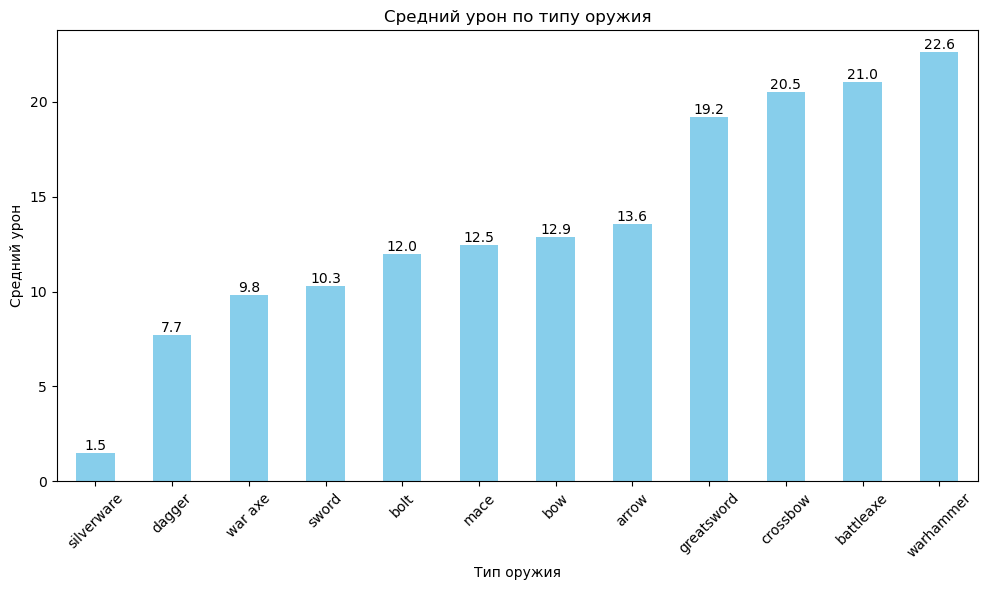

In [452]:
plt.figure(figsize=(10, 6))
bars = avg_damage.plot(kind='bar', color='skyblue')
plt.title('Средний урон по типу оружия')
plt.xlabel('Тип оружия')
plt.ylabel('Средний урон')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.1f}', ha='center', va='bottom')

plt.show()

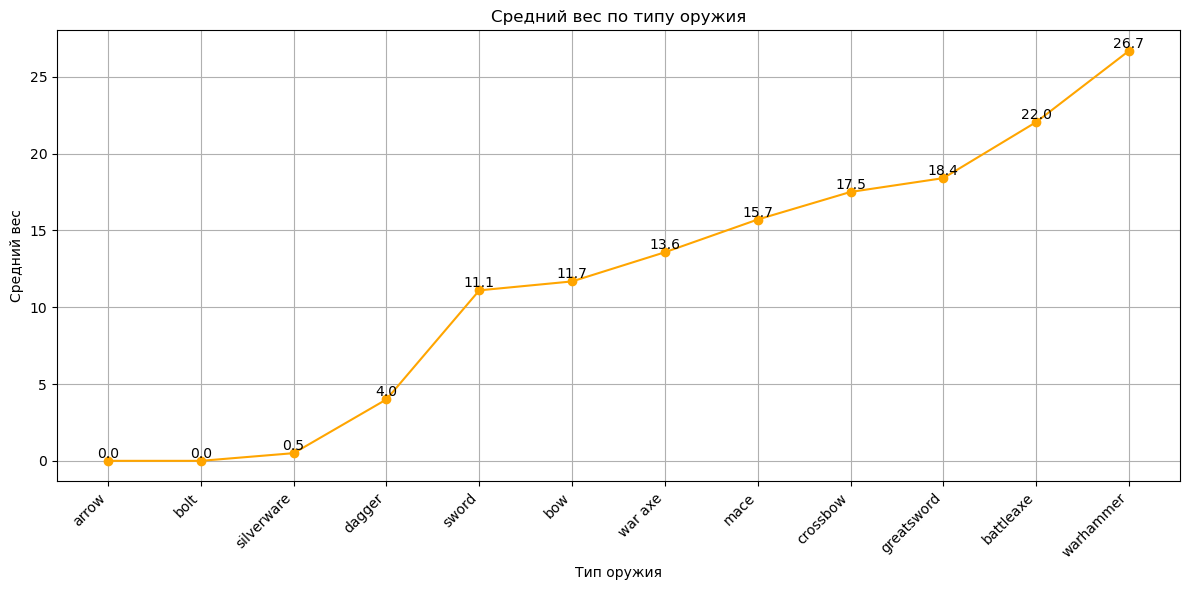

In [453]:
plt.figure(figsize=(12, 6))
plt.plot(avg_weight.index, avg_weight.values, marker='o', color='orange')
plt.title('Средний вес по типу оружия')
plt.xlabel('Тип оружия')
plt.ylabel('Средний вес')
plt.xticks(rotation=45, ha='right')
plt.grid()

for x, y in zip(avg_weight.index, avg_weight.values):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

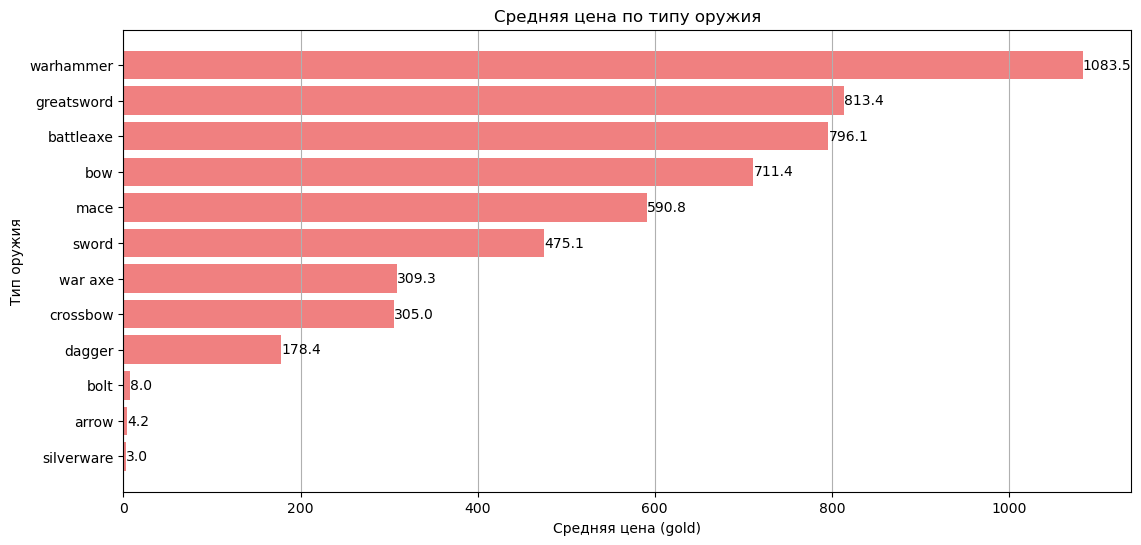

In [454]:
plt.figure(figsize=(13, 6))
bars = plt.barh(avg_gold.index, avg_gold.values, color='lightcoral')

plt.xlabel('Средняя цена (gold)')
plt.ylabel('Тип оружия')
plt.title('Средняя цена по типу оружия')
plt.grid(axis='x')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.1f}', va='center')

plt.show()

## 2. Диаграммы, библиотека Seaborn

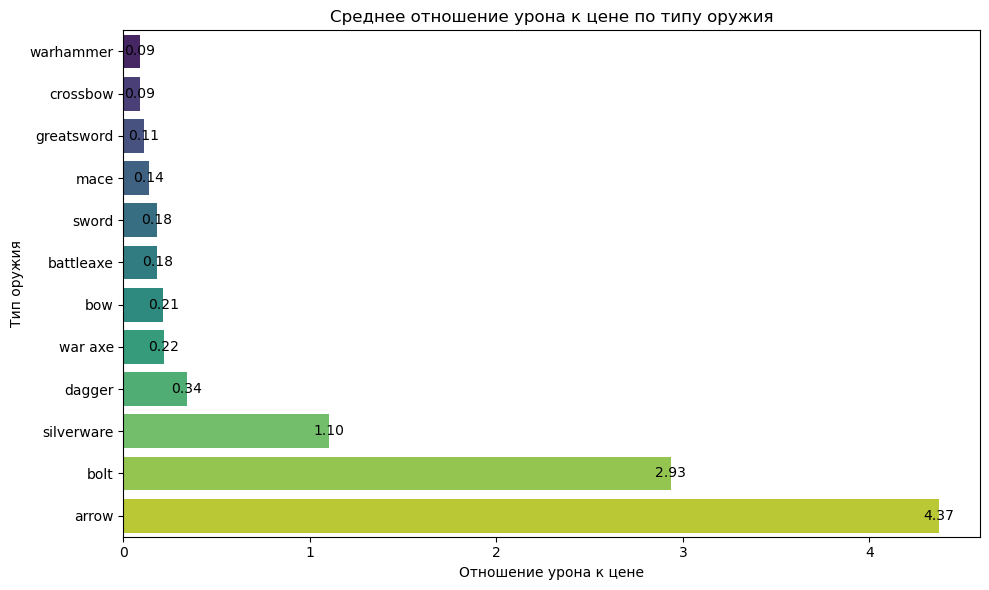

In [455]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='damage to price ratio', y='type', data=damage_price_ratio, palette='viridis')

plt.title('Среднее отношение урона к цене по типу оружия')
plt.xlabel('Отношение урона к цене')
plt.ylabel('Тип оружия')
plt.tight_layout()

for p in bar_plot.patches:
    value = p.get_width()
    bar_plot.annotate(f'{value:.2f}', 
                      (value, p.get_y() + p.get_height() / 2), 
                      ha='center', va='center', color='black', fontsize=10)

plt.show()

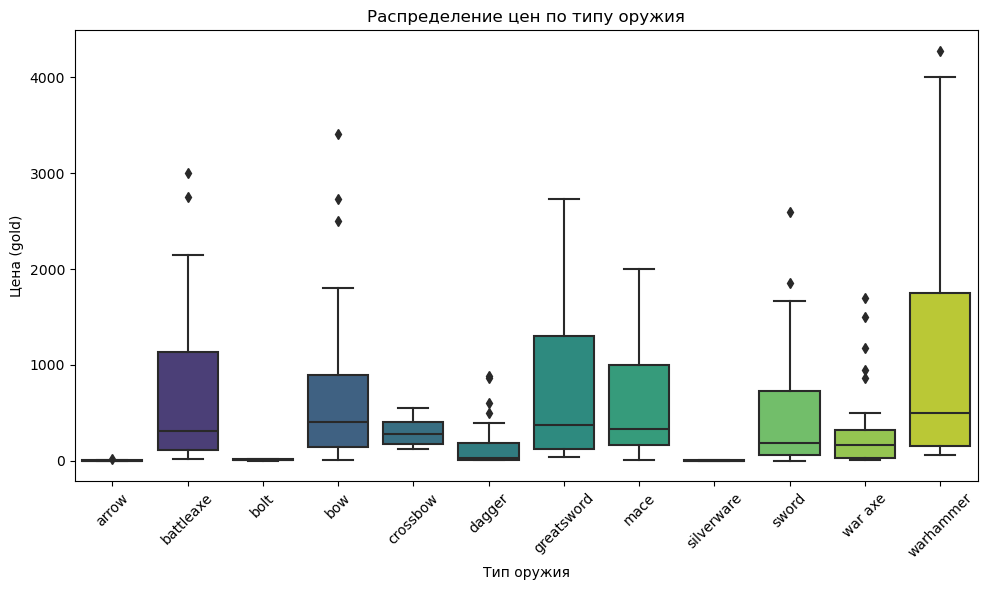

In [456]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='gold', data=df, palette='viridis')

plt.title('Распределение цен по типу оружия')
plt.xlabel('Тип оружия')
plt.ylabel('Цена (gold)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. "Портрет" типичного оружия (вывод к разделу 3)

- Наименование: Battleaxe (Двуручный топор)

- Характеристики:<br>
Урон: 20 - 28<br>
Вес: 22 - 36<br>
Цена: 28 - 4275<br>
- Улучшение:<br>
Топоры различных видов требуют разные материалы, например:<br>
Steel Ingot (Стальной слиток)<br>
Ebony Ingot (Эбонитовый слиток)<br>
Dragon Bone (Драконья кость)<br>
- Перки:<br>
Могут включать:<br>
Steel<br>
Daedric<br>
Dwarven<br>
...<br>
- Тип:<br>
Battleaxe (Двуручный топор).<br>
- Категория:<br>
Two-Handed (Двуручное оружие).<br>

**Анализ**
- Типичное оружие в Skyrim, в частности, двуручные топоры, характеризуются высокой мощью и весом, что создаёт баланс между потенциальным уроном и маневренностью.
- Более дорогие виды, такие как Daedric и Dragonbone, требуют редких материалов для улучшения, но обеспечивают высокий урон и эффективность, что делает их привлекательными для игроков на более поздних уровнях.
- Доступные варианты, например, Iron и Dwarven, подходят для начинающих, так как они легче с точки зрения ресурсов и могут быть усилены, обеспечивая прогресс во время игры.

# Общий вывод по проекту

Исследование данных о различных типах оружия в игре Skyrim дало возможность выявить улучшения в игровом балансе и удовлетворенности игроков через более глубокое понимание характеристик каждого типа оружия. Ниже представлены ключевые выводы на основе собранных данных.

1. Средний Урон и эффективность
- Лучший урон: самое сильное оружие - драконье. Лучшие типы - лук и арбалет. Это идеал к которому нужно стремиться в течении игрового процесса.
- Низкий урон: самое слабое оружие - железное и стальное (не считая шуточные варианты). Самый слабый тип - war axe.
2. Ценовой баланс
- Оружия с высоким уроном зачастую имеют высокую цену. Например, Daedric Bow и Dragonbone Bow имеют высокие цены (2500 и 2725 золота соответственно) при этом предлагая значительный урон. Это может затруднить доступ к сильным видам оружия, особенно начинающим игрокам. Это будет стимулировать игроков проходить задания для получения уникального бесплатного оружия.
3. Вес оружия и игровой процесс
- Легкие и тяжелые оружия: легкие оружия (например, Dagger и Bow), дают игрокам больше гибкости в стратегии боя. Тяжелые виды, такие как Warhammer, могут затруднять передвижение, что должно быть учтено при балансировке.
- Балансировка весов: большинство игроков могут предпочесть легкие варианты, чтобы избежать замедления. Рассмотрение возможности снижения общего веса наиболее тяжелых типов оружия может сделать их более приемлемыми для использования.
4. Апгрейды и уникальные особенности
- Доступные апгрейды: у каждого типа оружия есть свои особенности — некоторые требуют специальные материалы для улучшения. Это создает разнообразие для игроков. Однако имеется необходимость поднятия характеристик у квестовых предметов. Отсутствие возможности улучшения у уникальных предметов делает их актуальными только в начале игры.
- Уникальные механики: чтобы повысить интерес к менее популярным видам оружия, Bethesda может рассмотреть добавление уникальных механик и способностей, что сделает это оружие более популярным.
5. Рынок и экономика внутри игры
- Динамика цен: некоторые виды оружия, как Dwarven Warhammer и Ebony Mace, имеют высокую цену без значительного повышения урона по сравнению с более дешевыми аналогами. Это может вызвать недовольство игроков на фоне их ожиданий.
- Квесты: внедрение квестов, новых материалов, валюты или NPC, с помощью которых можно будет улучшить уникальное оружие повысит интерес к игре и поднимет используемость у квестовых предметов.

**Рекомендации для Bethesda**
- Балансировка урона и цены:
провести переработку ценовой категории и урона для некоторых типов оружия, чтобы сделать их более сопоставимыми в пределах одной категории (боевые топоры и мечи).
- Улучшения и специальные эффекты:
рассмотреть возможность добавления уникальных эффектов или дополнительных способностей для некоторых видов оружия, чтобы сделать их более привлекательными для игроков.
- Обратная связь от игроков:
регулярно собирать обратную связь от игроков относительно баланса и характеристик оружия, чтобы адаптировать будущие патчи и дополнения в соответствии с реальным опытом пользователей.
- Обновление экономики игры:
пересмотреть распределение доступных ресурсов и материалов для улучшения, чтобы сделать процесс более доступным и увлекательным для всех категорий игроков.<br><br>
Данные анализы показывают, что существует значительный потенциал для улучшения баланса и привлечения игроков через пересмотр характеристик, цен, и уникальных возможностей для каждого типа оружия в Skyrim. Внедрение вышеописанных рекомендаций поможет улучшить опыт игры и повысит удовлетворенность пользователей.

## Проделанная работа
**Предобработка данных**
- Данные загружены и проведен первичный анализ.
- Наименования столбцов и весь текст приведены к нижнему регистру.
- Пропущенные значения изучены и обработаны.
- Типы данных в столбцах проверены.
- Найдены и удалены дубликаты.
- Получен чистый и организованный датафрейм, готовый для дальнейшего анализа.<br><br>

**Исследовательский анализ данных**
- Проведена индексация по координатам и логическая индексация по различным условиям.
- Данные отсортированы по урону, весу и цене, выявлены наибольшие и наименьшие значения.
- Реализована фильтрация на основе условий через методы query и where.
- Созданы сводные таблицы, подтверждающие закономерности, такие как соотношение между ценой и уроном.
- Данные сгруппированы, вычислены агрегатные функциикции для дальнейшего анализа.
- В рамках исследовательского анализа были исследованы закономерности и взаимосвязи, которые могут быть полезны для решения бизнес-задачи. Это помогло лучше понять различные типы оружия. Также определены лучшие оружия по типам и цене.<br><br>